### Deliverable 1: Preprocessing the Data for a Neural Network

In [239]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [240]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
application_df = application_df.drop(columns=["EIN", "NAME"], axis=0)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [241]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
print(application_df.nunique())

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [242]:
cv_list = []
for c in application_df.columns:
    if isinstance(application_df[c][0], str):
        cv_list.append(c)
cv_list

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [243]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
at_counts = application_df["APPLICATION_TYPE"].value_counts()
at_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

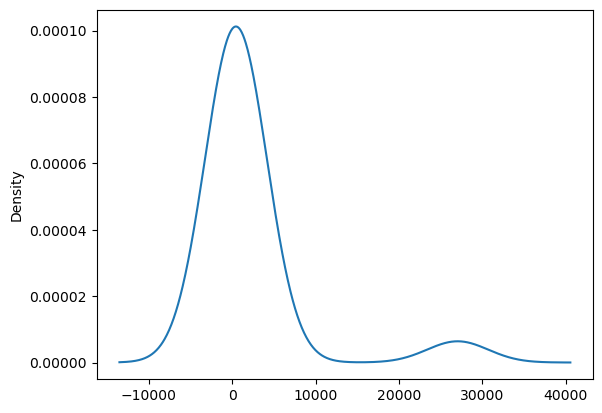

In [244]:
# Visualize the value counts of APPLICATION_TYPE
#  YOUR CODE GOES HERE
at_counts.plot.density()
plt.show()

In [245]:
# Determine which values to replace if counts are less than ...?
#  YOUR CODE GOES HERE
replace_at = list(at_counts[at_counts < 1000].index)

# Replace in dataframe
for app in replace_at:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [246]:
# at = pd.DataFrame(application_df[["APPLICATION_TYPE", "IS_SUCCESSFUL"]].value_counts(), columns=['Count']).reset_index()
# at = at.pivot(index="APPLICATION_TYPE", columns=["IS_SUCCESSFUL"], values=["Count"])["Count"].reset_index()
# at["prob"] = at[1]/(at[0]+at[1])
# at = at.set_index("APPLICATION_TYPE")
# at = dict(at["prob"])
# at

In [247]:
# application_df["APPLICATION_TYPE"] = application_df["APPLICATION_TYPE"].apply(lambda x: at[x])
# application_df

In [248]:
af_counts = application_df["AFFILIATION"].value_counts()
af_counts

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

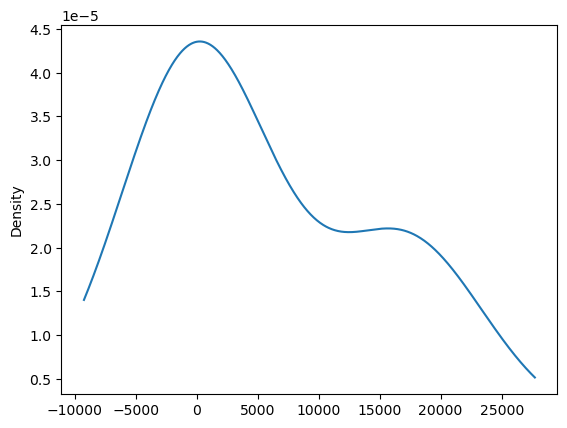

In [249]:
af_counts.plot.density()
plt.show()

In [250]:
# Determine which values to replace if counts are less than ...?
#  YOUR CODE GOES HERE
replace_af = list(af_counts[af_counts < 5000].index)

# Replace in dataframe
for app in replace_af:
    application_df.AFFILIATION = application_df.AFFILIATION.replace(app,"Independent")
    
# Check to make sure binning was successful
application_df.AFFILIATION.value_counts()

Independent         18594
CompanySponsored    15705
Name: AFFILIATION, dtype: int64

In [251]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
classification_counts = application_df["CLASSIFICATION"].value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

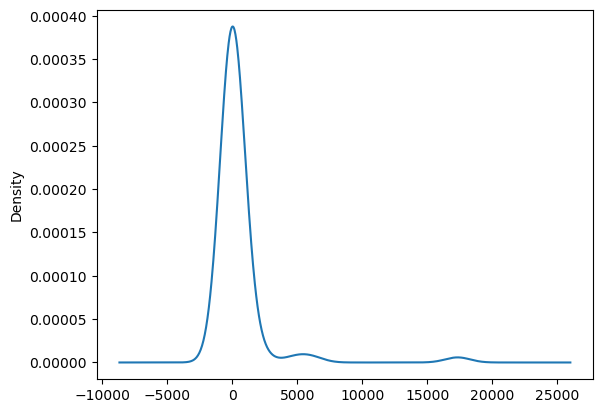

In [252]:
# Visualize the value counts of CLASSIFICATION
#  YOUR CODE GOES HERE
classification_counts.plot.density()
plt.show()

In [253]:
# Determine which values to replace if counts are less than ..?
#  YOUR CODE GOES HERE
replace_classification = list(classification_counts[classification_counts < 100].index)

# Replace in dataframe
for cls in replace_classification:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [254]:
# Generate our categorical variable lists
#  YOUR CODE GOES HERE

cv_list = []
for c in application_df.columns:
    if isinstance(application_df[c][0], str):
        cv_list.append(c)
cv_list

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [255]:
organization_counts = application_df["ORGANIZATION"].value_counts()
organization_counts

Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64

In [256]:
replace_organization = list(organization_counts[organization_counts < 10000].index)

# Replace in dataframe
for cls in replace_organization:
    application_df.ORGANIZATION = application_df.ORGANIZATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.ORGANIZATION.value_counts()

Trust          23515
Association    10255
Other            529
Name: ORGANIZATION, dtype: int64

In [257]:
uc_counts = application_df["USE_CASE"].value_counts()
uc_counts

Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

In [258]:
replace_uc = list(uc_counts[uc_counts < 5000].index)

# Replace in dataframe
for cls in replace_uc:
    application_df.USE_CASE = application_df.USE_CASE.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.USE_CASE.value_counts()

Preservation    28095
ProductDev       5671
Other             533
Name: USE_CASE, dtype: int64

In [259]:
status_counts = application_df["STATUS"].value_counts()
status_counts

1    34294
0        5
Name: STATUS, dtype: int64

In [260]:
sc_counts = application_df["SPECIAL_CONSIDERATIONS"].value_counts()
sc_counts

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [261]:
application_df.drop(columns=["STATUS", "SPECIAL_CONSIDERATIONS"], inplace=True)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,Other,Independent,C1000,ProductDev,Association,0,5000,1
1,T3,Independent,C2000,Preservation,Other,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,T3,Independent,C1000,Other,Trust,100000-499999,142590,1
...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,0,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,0,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,0,5000,0
34297,T5,Independent,C3000,ProductDev,Association,0,5000,1


In [262]:
income_counts = application_df["INCOME_AMT"].value_counts()
income_counts

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [263]:
convert_dict = {
    "0": "NO",
    "1-9999": "SMALL",
    "10000-24999": "SMALL",
    "25000-99999": "SMALL",
    "100000-499999": "SMALL",
    "1M-5M": "HIGH",
    "5M-10M": "HIGH",
    "10M-50M": "HIGH",
    "50M+": "HIGH",
}

# convert_dict = {
#     "0": 1,
#     "1-9999": 5000,
#     "10000-24999": 10000,
#     "25000-99999": 25000,
#     "100000-499999": 100000,
#     "1M-5M": 1000000,
#     "5M-10M": 5000000,
#     "10M-50M": 10000000,
#     "50M+": 8,
# }

application_df["INCOME_AMT"] = application_df["INCOME_AMT"].apply(lambda x: convert_dict[x])
# application_df["INCOME_AMT"] = application_df["INCOME_AMT"].apply(lambda x: np.log(x))
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,Other,Independent,C1000,ProductDev,Association,NO,5000,1
1,T3,Independent,C2000,Preservation,Other,SMALL,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,NO,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,SMALL,6692,1
4,T3,Independent,C1000,Other,Trust,SMALL,142590,1
...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,NO,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,NO,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,NO,5000,0
34297,T5,Independent,C3000,ProductDev,Association,NO,5000,1


In [264]:
# application_df["ASK_AMT"] = application_df["ASK_AMT"].apply(lambda x: 1 if x >50000 else 0)
# application_df["ASK_AMT"] = application_df["ASK_AMT"].apply(lambda x: np.log(x))

In [265]:
application_df.drop(columns=["ASK_AMT"], inplace=True)

In [268]:
# Generate our categorical variable lists
#  YOUR CODE GOES HERE

cv_list = []
for c in application_df.columns:
    if isinstance(application_df[c][0], str):
        cv_list.append(c)
cv_list

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [269]:
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,IS_SUCCESSFUL
0,Other,Independent,C1000,ProductDev,Association,NO,1
1,T3,Independent,C2000,Preservation,Other,SMALL,1
2,T5,CompanySponsored,C3000,ProductDev,Association,NO,0
3,T3,CompanySponsored,C2000,Preservation,Trust,SMALL,1
4,T3,Independent,C1000,Other,Trust,SMALL,1
...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,NO,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,NO,0
34296,T3,CompanySponsored,C2000,Preservation,Association,NO,0
34297,T5,Independent,C3000,ProductDev,Association,NO,1


In [270]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#  YOUR CODE GOES HERE
encode_df = pd.DataFrame(enc.fit_transform(application_df[cv_list]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(cv_list)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Independent,CLASSIFICATION_C1000,CLASSIFICATION_C1200,...,CLASSIFICATION_Other,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Other,ORGANIZATION_Trust,INCOME_AMT_HIGH,INCOME_AMT_NO,INCOME_AMT_SMALL
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [271]:
# Merge one-hot encoded features and drop the originals
#  YOUR CODE GOES HERE
application_df = application_df.merge(encode_df,left_index=True,right_index=True).drop(labels=cv_list,axis=1)
application_df

,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Independent,CLASSIFICATION_C1000,...,CLASSIFICATION_Other,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Other,ORGANIZATION_Trust,INCOME_AMT_HIGH,INCOME_AMT_NO,INCOME_AMT_SMALL
0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
34295,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
34296,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
34297,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [272]:
application_df

,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Independent,CLASSIFICATION_C1000,...,CLASSIFICATION_Other,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Other,ORGANIZATION_Trust,INCOME_AMT_HIGH,INCOME_AMT_NO,INCOME_AMT_SMALL
0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
34295,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
34296,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
34297,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [273]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(labels=["IS_SUCCESSFUL"],axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [274]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [275]:
# X_train_scaled = X_train
# X_test_scaled = X_test

In [276]:
hg = pd.read_excel("hyper_grid.xlsx")
hg

,hnl1,hnl2,hnl3,a1,a2,a3,epoch
0,120,60,30,relu,relu,tanh,20
1,120,60,30,tanh,tanh,relu,20
2,60,30,10,relu,relu,tanh,20
3,60,30,10,tanh,tanh,relu,20


### Deliverable 2: Compile, Train and Evaluate the Model

In [277]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

max_id = -1
max_acc = 0
flag = -1
    
for row in hg.itertuples():
    print(max_id, max_acc, row)
    # Define the model - deep neural net
    number_input_features = len(X_train[0])
    
    hidden_nodes_layer1 =  int(row[1])
    hidden_nodes_layer2 = int(row[2])
    hidden_nodes_layer3 = int(row[3])

    nn = tf.keras.models.Sequential()

    print(row[4])
    # First hidden layer
    nn.add(
        tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=row[4])
    )

    # Second hidden layer
    nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=row[5]))

    # Third hidden layer
    nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=row[6]))

    # Output layer
    nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Check the structure of the model
    nn.summary()
    
    # Compile the model
    nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

    
    # Compile the model
    nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

    # Create a callback that saves the model's weights every 5 epochs
    # Train the model
    fit_model = nn.fit(X_train_scaled,y_train,epochs=row[7])

    # Evaluate the model using the test data
    model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=0)
    print(f"{row[0]} Loss: {model_loss}, Accuracy: {model_accuracy}")
    
    if model_accuracy > max_acc:
        max_acc = model_accuracy
        max_id = row[0]      
    
    # Export our model to HDF5 file
    nn.save(f"AlphabetSoupCharityOptmized_{row[0]}.h5")

-1 0 Pandas(Index=0, hnl1=120, hnl2=60, hnl3=30, a1='relu', a2='relu', a3='tanh', epoch=20)
relu
Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_136 (Dense)            (None, 120)               3600      
_________________________________________________________________
dense_137 (Dense)            (None, 60)                7260      
_________________________________________________________________
dense_138 (Dense)            (None, 30)                1830      
_________________________________________________________________
dense_139 (Dense)            (None, 1)                 31        
Total params: 12,721
Trainable params: 12,721
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
804/804 [==============================] - 1s 917us/step - loss: 0.5787 - accuracy: 0.7127
Epoch 2/20
804/804 [============================

804/804 [==============================] - 1s 851us/step - loss: 0.5514 - accuracy: 0.7320
Epoch 11/20
804/804 [==============================] - 1s 880us/step - loss: 0.5461 - accuracy: 0.7350
Epoch 12/20
804/804 [==============================] - 1s 859us/step - loss: 0.5459 - accuracy: 0.7358
Epoch 13/20
804/804 [==============================] - 1s 780us/step - loss: 0.5515 - accuracy: 0.7303
Epoch 14/20
804/804 [==============================] - 1s 766us/step - loss: 0.5447 - accuracy: 0.7350
Epoch 15/20
804/804 [==============================] - 1s 762us/step - loss: 0.5540 - accuracy: 0.7278
Epoch 16/20
804/804 [==============================] - 1s 819us/step - loss: 0.5469 - accuracy: 0.7361
Epoch 17/20
804/804 [==============================] - 1s 814us/step - loss: 0.5446 - accuracy: 0.7369
Epoch 18/20
804/804 [==============================] - 1s 853us/step - loss: 0.5469 - accuracy: 0.7356
Epoch 19/20
804/804 [==============================] - 1s 783us/step - loss: 0.5451 -

In [289]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
# Create the SVM model
svm = SVC(kernel='linear')

In [290]:
# Train the model
svm.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [291]:
# Evaluate the model
y_pred = svm.predict(X_test_scaled)
print(f" SVM model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 SVM model accuracy: 0.715


In [300]:
from sklearn.ensemble import RandomForestClassifier
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.726


In [301]:
from sklearn.linear_model import LogisticRegression
# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
log_classifier.fit(X_train_scaled,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test_scaled)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 0.719


In [278]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_152 (Dense)            (None, 80)                2400      
_________________________________________________________________
dense_153 (Dense)            (None, 30)                2430      
_________________________________________________________________
dense_154 (Dense)            (None, 1)                 31        
Total params: 4,861
Trainable params: 4,861
Non-trainable params: 0
_________________________________________________________________


In [279]:
# # Import checkpoint dependencies
# import os
# from tensorflow.keras.callbacks import ModelCheckpoint

# # Define the checkpoint path and filenames
# os.makedirs("checkpoints/",exist_ok=True)
# checkpoint_path = "checkpoints/weightsOptFinal.{epoch:02d}.hdf5"

In [280]:
# # Compile the model
# nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# # Create a callback that saves the model's weights every 5 epochs
# cp_callback = ModelCheckpoint(
#     filepath=checkpoint_path,
#     verbose=1,
#     save_weights_only=True,
#     save_freq=5)

# # Train the model
# fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# # Evaluate the model using the test data
# model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [281]:
# # Export our model to HDF5 file
# nn.save("AlphabetSoupCharityOptmizedFinal.h5")